# Принятие решений в бизнесе на примере крупного интернет-магазина

Цели проекта:   
•	Необходимо приоритизировать гипотезы для увеличения выручки интернет-магазина   
•	Необходимо проанализировать результаты А/В теста

**Часть 1. Приоритизация гипотез**

План работы:   
•	Приоритизировать гипотезы методом ICE;    
•	Приоритизировать гипотезы методом RICE;   
•	Проанализировать результаты. 
   
Описание данных:   
•	Hypothesis — краткое описание гипотезы;   
•	Reach — охват пользователей по 10-балльной шкале;   
•	Impact — влияние на пользователей по 10-балльной шкале;   
•	Confidence — уверенность в гипотезе по 10-балльной шкале;   
•	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.   

**Часть 2. Анализ А/В-теста**   

•	Построить графики кумулятивной выручки по группам, кумулятивного среднего чека по группам, относительного изменения кумулятивного среднего чека группы В к группе А, кумулятивного среднего количества заказов на посетителя по группам и относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.   
•	Построить точечный график количества заказов по пользователям, посчитать 95-й и 99-й перцентили количества заказов на пользователя и выбрать границу для определения аномальных пользователей.   
•	Построить точечный график стоимостей заказов, посчитать 95-й и 99-й перцентили стоимости заказов и выбрать границу для определения аномальных пользователей.   
•	Посчитать статистическую значимость различий в среднем количестве заказов на посетителя и в среднем чеке заказа между группами по «сырым» данным.   
•	Посчитать статистическую значимость различий в среднем количестве заказов на посетителя и в среднем чеке заказа между группами по «очищенным» данным.

   
Описание данных:   
Датасет orders   
•	transactionId — идентификатор заказа;   
•	visitorId — идентификатор пользователя, совершившего заказ;   
•	date — дата, когда был совершён заказ;   
•	revenue — выручка заказа;   
•	group — группа A/B-теста, в которую попал заказ.   
Датасет visitors    
•	date — дата;   
•	group — группа A/B-теста;   
•	visitors — количество пользователей в указанную дату в указанной группе A/B-теста


## Общий вывод

В ходе проведения первой части проектной работы мы использовали список гипотез для увеличения выручки и их параметры: Reach, Impact, Confidence и Efforts. Было применено два метода приоритизации гипотез ICE и RICE.

В результате анализа выявлено, что гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" попали в первую тройку методов ICE и RICE, можно обозначить их, как наиболее перспективные.   


Для анализа А/В-теста во второй части проектной работы использовались следующие данные из двух датасетов: идентификатор заказа, идентификатор пользователя, дата заказа, выручка заказа, группа A/B-теста.   
В ходе проведения анализа были выявлены крупные заказы и выбросы. Была выбрана граница определения аномальных заказов: выручка более 58233, количество заказов более 4.   

Есть статистически значимое различие по количеству заказов между группами как по сырым данным, так и после фильтрации аномалий.   
Нет статистически значимого различия по среднему чеку между группами как по сырым данным, так и после фильтрации аномалий.   
График различия количества заказов между группами сообщает, что результаты группы B лучше группы A.   
Было принято решение остановить тест и признать его успешным, победителем признаем группу В.


**Изучение и предобработка данных**

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import scipy.stats as stats

In [2]:
# изучим файл с гипотезами
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
pd.set_option('display.max_colwidth', None)
hypothesis


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
# изучим датасеты orders и visitors
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [5]:
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Необходимо:   
• привести к общему виду названия столбцов в таблице hypothesis;   
• изменить тип даты в таблицах orders и visitors;   
• проверить наличие дубликатов


In [8]:
# переименовываем названия столбцов
hypothesis.columns = hypothesis.columns.str.lower()

In [9]:
# изменяем тип даты
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [10]:
# проверяем наличие дубликатов
display(visitors.duplicated().sum())
display(orders.duplicated().sum())

0

0

В результате изучения датасетов обнаружены некорректные названия столбцов и неверный тип данных в столбцах с датой. Пропусков и дубликатов не обнаружено.
Для дальнейшей обработки данных произведены изменения

## Часть 1. Приоритизация гипотез

1. Применяем метод ICE  для приоритезации гипотез. Для расчета приоритета берем параметры:  
   
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;   
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;    
Efforts — сколько стоит протестировать эту гипотезу.    

In [11]:
# применяем метод ICE  для приоритезации гипотез
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
# выведем список гипотез по убыванию приоритета
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы:   
8 Запустить акцию, дающую скидку на товар в день рождения, значение ICE - 16.2   
0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, значение ICE - 13.3      
7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, значение ICE - 11.2   
6 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию, значение ICE - 8   
2 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, значение ICE - 7


2. Применяем метод RICE  для приоритезации гипотез. Для расчета приоритета берем параметры:  
   
Reach — скольких пользователей затронет изменение, которое вы хотите внести;   
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;   
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;    
Efforts — сколько стоит протестировать эту гипотезу.    

In [12]:
# применяем метод RICE  для приоритезации гипотез
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
# выведем список гипотез по убыванию приоритета
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы:   
7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, значение RICE - 112   
2 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, значение RICE - 56      
0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, значение RICE - 40   
6 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию, значение RICE - 40   
8 Запустить акцию, дающую скидку на товар в день рождения, значение RICE - 16.2


In [13]:
hypothesis[['hypothesis','ICE', 'RICE']].sort_values(by='RICE', ascending=False).head(5)

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2


**Вывод**   
Метод ICE, в отличии от RICE, не учитывает параметр Reach - количество пользователей, которых затронут изменения. В результате анализа выявлено, что приоритеты перспективных гипотез ICE и RICE разнятся. Например, наиболее перспективная гипотеза по методу ICE "Запустить акцию, дающую скидку на товар в день рождения" коснется только тех пользователей, у которых день Рождения выпадает на период проведения акции.   
Гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" попали в первую тройку методов ICE и RICE, можно обозначить их, как наиболее перспективные.

## Часть 2. Анализ А/В-теста

1. Построим график кумулятивной выручки по группам

In [14]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply\
(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
 .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply\
(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
 .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


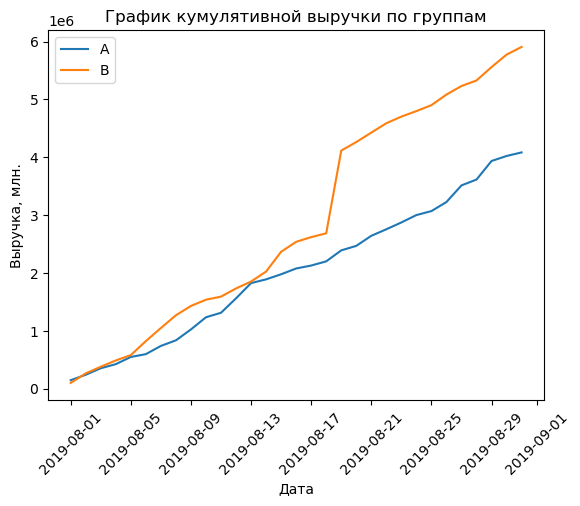

In [15]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.title('График кумулятивной выручки по группам')
plt.xlabel("Дата")
plt.ylabel("Выручка, млн.")
plt.legend() 


В графике группы B происходит резкий рост 18.08.2019, что может свидетельствовать об увеличении количества заказов или о появлении очень дорогих заказов

2. Построим график кумулятивного среднего чека по группам:

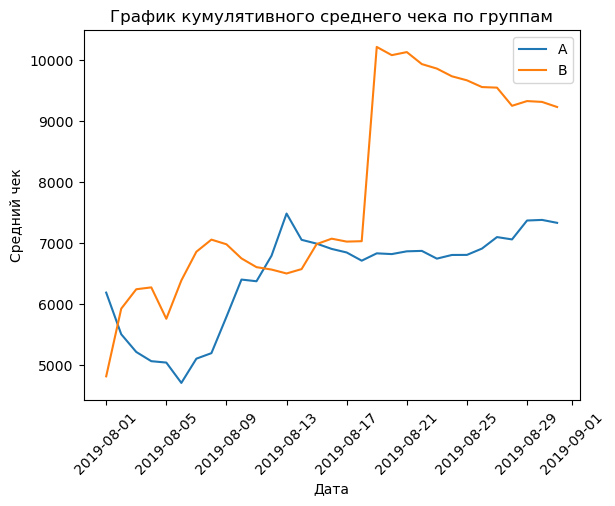

In [16]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.legend() 

График неравномерный, что говорит о наличии крупных заказов. Особенно выделяется дата 18.08.2019 в группе В, что ранее мы обнаружили в графике кумулятивной выручки. Ближе к концу рассматриваемого периода графики становятся более равномерными. График группы А растет, а группы В падает. Необходимо больше данных, чтобы прийти к среднему чеку

3. Построим график относительного изменения кумулятивного среднего чека группы В к группе А

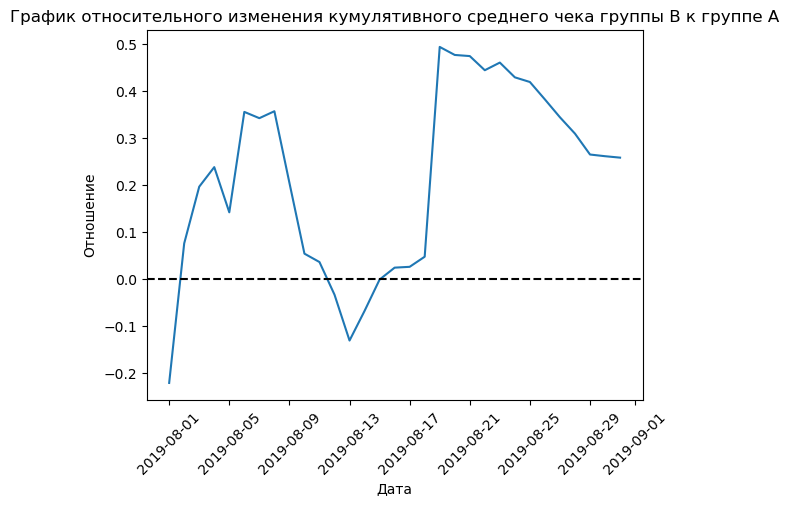

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', \
                                                   right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/\
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.xlabel("Дата")
plt.ylabel("Отношение")
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

Видим несколько крупных всплесков, что говорит о наличии крупных заказов или выбросов

4. Построим график кумулятивного среднего количества заказов на посетителя по группам

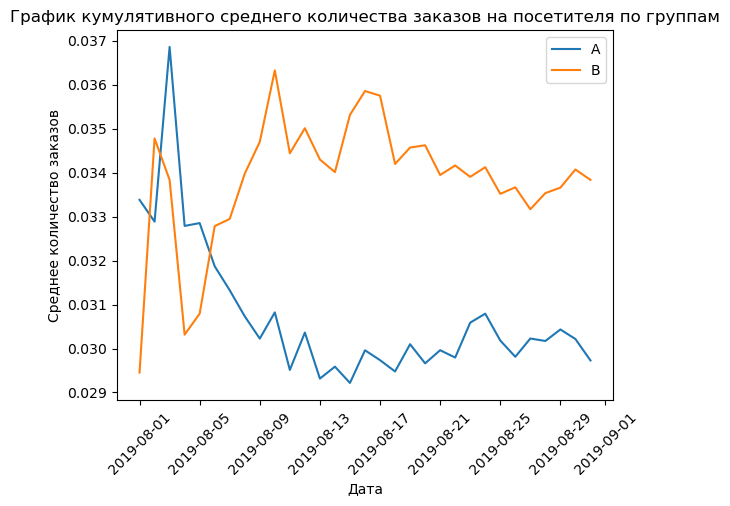

In [18]:
# считаем кумулятивное среднее количество заказов на посетителя по группам
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel("Дата")
plt.ylabel("Среднее количество заказов")
plt.legend()

Среднее количество заказов по группе В заметно выше, чем в группе А

5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

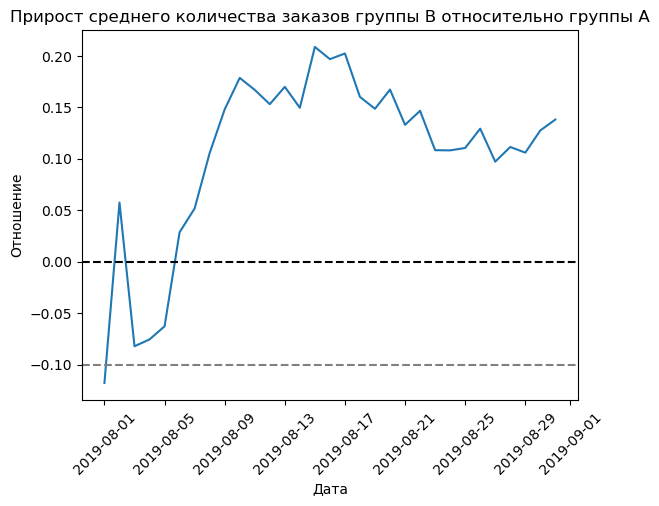

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']]\
       , left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/\
         mergedCumulativeConversions['conversionA']-1)
plt.xticks(rotation=45)
plt.title('Прирост среднего количества заказов группы B относительно группы A')
plt.xlabel("Дата")
plt.ylabel("Отношение")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
#plt.axis(["2019-04-01", '2019-04-23', -0.6, 0.6]) 

Рост среднего количества заказов неравномерный. Необходимо провести дополнительный анализ

6. Построим точечный график количества заказов по пользователям

Text(0, 0.5, 'Количество заказов')

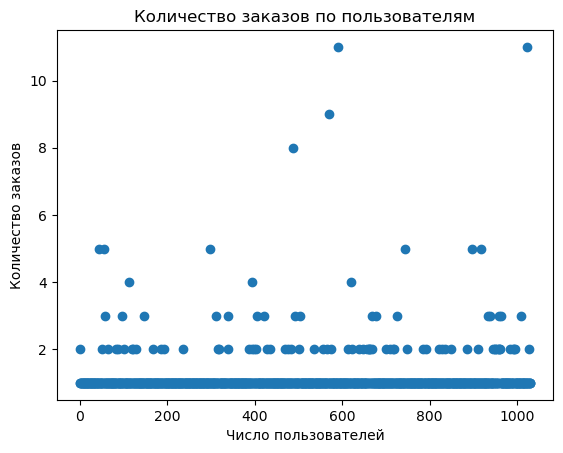

In [20]:
orders_by_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
orders_by_users.columns = ['visitorId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders']) 
plt.title('Количество заказов по пользователям')
plt.xlabel("Число пользователей")
plt.ylabel("Количество заказов")

Большинство пользователей делают заказ 1-2 раза. Довольно редки пользователи с заказами больше 2. Есть выбросы

7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [21]:
np.percentile(orders_by_users['orders'], [90, 95, 99])

array([1., 2., 4.])

Не более 5% пользователей совершали более 2 заказов и не более 1% пользователей совершали более 4 заказов. Выберем границу определения аномальных пользователей в 4 заказа


8. Построим точечный график стоимостей заказов

Text(0, 0.5, 'Стоимость заказов')

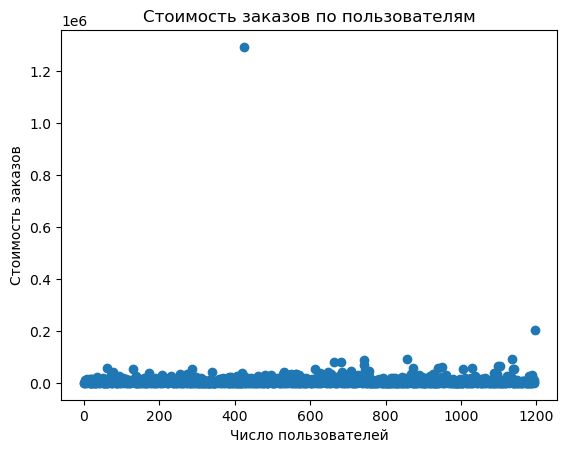

In [22]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов по пользователям')
plt.xlabel("Число пользователей")
plt.ylabel("Стоимость заказов")

Видим большой выброс, вероятно, он давал всплеск на графике кумулятивного среднего чека по группам. Видно, еще несколько выбивающихся значений. Необходимо определить границу для аномальных заказов

Построим точечный график стоимостей заказов без выбросов

Text(0, 0.5, 'Стоимость заказов')

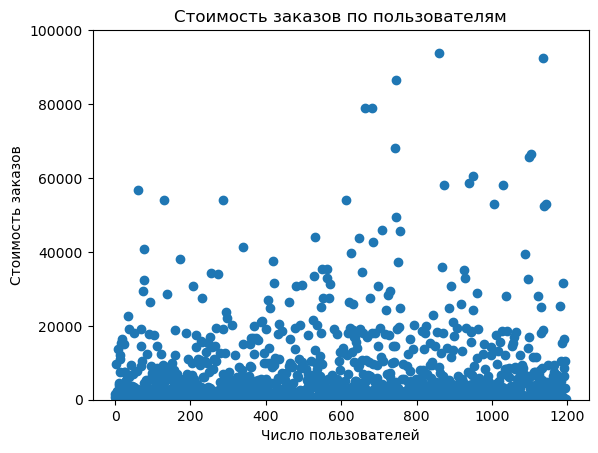

In [23]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 100000)
plt.title('Стоимость заказов по пользователям')
plt.xlabel("Число пользователей")
plt.ylabel("Стоимость заказов")

В основном стоимость заказов не превышает 20000

9.	Посчитаем 95-й и 99-й перцентили стоимости заказов

In [24]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более чем у 5% пользователей чек свыше 28000 и не более чем у 1% пользователей свыше 58233. Выберем границу определения аномальных заказов в 58233

10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [25]:
# изучим код и устройство таблицы
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)



Выведем основную и альтернативные гипотезы:   

•	H0: Количество заказов в группе A равно количеству заказов в группе B    
•	H1: Количество заказов в группе A не равно количеству заказов в группе B  

In [26]:
# для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

# объявим переменные, в которых пользователям из разных групп будет соответствовать количество заказов
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
alpha = .05 
results = stats.mannwhitneyu(sampleA, sampleB)


print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('Относительный выигрыш группы B:', "{0:.3%}".format(sampleB.mean() / sampleA.mean() - 1))

p-значение:  0.017
Отвергаем нулевую гипотезу
Относительный выигрыш группы B: 13.808%


Отвергаем нулевую гипотезу. Количество заказов в группе A не равно количеству заказов в группе B. Относительный выигрыш группы В равен 13.808%

11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Выведем основную и альтернативные гипотезы:   

•	H0: Средний чек в группе A равен среднему чеку в группе B    
•	H1: Средний чек в группе A не равен среднему чеку в группе B  

In [27]:
alpha = 0.05
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', "{0:.3f}".format(results.pvalue))
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Отношение среднего чека группы B к среднему чеку группы А:', '{0:.3%}'.format(orders[orders['group']=='B']['revenue']\
                                                            .mean()/orders[orders['group']=='A']['revenue'].mean()-1))


p-значение:  0.729
Не получилось отвергнуть нулевую гипотезу
Отношение среднего чека группы B к среднему чеку группы А: 25.871%


Не получилось отвергнуть нулевую гипотезу. Средний чек в группе A равен среднему чеку в группе B. Отношение среднего чека группы B к среднему чеку группы А равен 25.871%

12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [28]:
# отберем пользователей с более чем 4 заказми
usersWithManyOrders = pd.concat(
    [
        orders_by_users[orders_by_users['orders'] > orders_by_users['orders'].quantile(0.99)]['visitorId'],
        orders_by_users[orders_by_users['orders'] > orders_by_users['orders'].quantile(0.99)]['visitorId'],
    ],
    axis=0,
)
# отберем пользователей с заказами на сумму более 58233
usersWithExpensiveOrders = orders[orders['revenue'] > orders['revenue'].quantile(0.99)]['visitorId']
# объединим полученные данные
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Выведем основную и альтернативные гипотезы:   

•	H0: Количество заказов в группе A равно количеству заказов в группе B    
•	H1: Количество заказов в группе A не равно количеству заказов в группе B

In [29]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
alpha = .05 
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)


print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('Относительный выигрыш группы B:', "{0:.3%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение:  0.014
Отвергаем нулевую гипотезу
Относительный выигрыш группы B: 15.389%


Отвергаем нулевую гипотезу. Количество заказов в группе A не равно количеству заказов в группе B. Относительный выигрыш группы В равен 15.331%

13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Выведем основную и альтернативные гипотезы:   

•	H0: Средний чек в группе A равен среднему чеку в группе B    
•	H1: Средний чек в группе A не равен среднему чеку в группе B  

In [30]:
alpha = .05 
results = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )

print('p-значение: ', "{0:.3f}".format(results.pvalue))
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('Отношение среднего чека группы B к среднему чеку группы А:',
    "{0:.3%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-значение:  0.958
Не получилось отвергнуть нулевую гипотезу
Отношение среднего чека группы B к среднему чеку группы А: -1.417%


Не получилось отвергнуть нулевую гипотезу. Средний чек в группе A равен среднему чеку в группе B. Отношение среднего чека группы B к среднему чеку группы А равен -1.417%

14. Принимаем решение по результатам теста

•	Есть статистически значимое различие по количеству заказов между группами как по сырым данным, так и после фильтрации аномалий    
•	Нет статистически значимого различия по среднему чеку между группами как по сырым данным, так и после фильтрации аномалий   
•	График различия количества заказов между группами сообщает, что результаты группы B лучше группы A   

**Вывод**   
Показатели группы В превышают показатели группы А. Принимаем решение остановить тест и признать его успешным, победителем признаем группу В.